In [1]:
import numpy as np
import pandas as pd

In [42]:
right_df = pd.read_csv('../../data/right_report.csv')
wrong_df = pd.read_csv('../../data/wrong_report.csv')

In [49]:
def strToDouble(lst):
    for i in range(len(lst)):
        if (isinstance(lst[i], str)):
            lst[i] = float(lst[i].replace(",", "."))
    return lst    

In [58]:
def MergeList(sr_list, sw_list, rev=True):
    mergelist = []
    for i in range(len(sr_list)):
        mergelist.append((sr_list[i], 0))
        
    for i in range(len(sw_list)):
        mergelist.append((sw_list[i], 1))
    
    mergelist.sort(reverse=rev)
    return mergelist

In [38]:
def FDR(mergelist):
    curOne = 0

    cntElem = []
    FDR = []

    for i in range(len(mergelist)):
        if (i > 0 and mergelist[i - 1][0] != mergelist[i][0]):
            cntElem.append(i - curOne)
            FDR.append(curOne/i)
        curOne += mergelist[i][1]

    cntElem.append(len(mergelist))
    FDR.append(curOne/len(mergelist))
    
    return cntElem, FDR

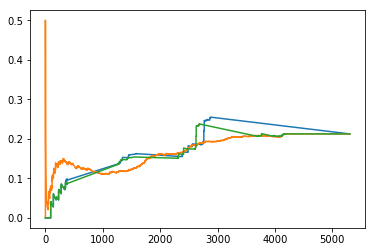

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline 

right_df['p-value by prediction generation'] *= -1
wrong_df['p-value by prediction generation'] *= -1


x1, y1 = FDR(MergeList(strToDouble(right_df['Score'].tolist()), wrong_df['Score'].tolist()))
plt.plot(x1, y1)
x3, y3 = FDR(MergeList(right_df['Norm Score By Prediction'].tolist(), wrong_df['Normalized score'].tolist()))
plt.plot(x3, y3)
x2, y2 = FDR(MergeList(list(zip(right_df['p-value by prediction generation'].tolist(), strToDouble(right_df['Score'].tolist()))),
                       list(zip(wrong_df['p-value by prediction generation'].tolist(), wrong_df['Score'].tolist()))))
plt.plot(x2, y2)

In [80]:
def uniqueFDR(mergelist):
    curOne = 0
    cnt = 0

    cntElem = []
    FDR = []

    used = set()
    
    for i in range(len(mergelist)):
        if (i > 0 and mergelist[i - 1][0][0] != mergelist[i][0][0]):
            cntElem.append(cnt - curOne)
            FDR.append(curOne/cnt)
        if (mergelist[i][0][1] not in used):
            curOne += mergelist[i][1]
            cnt += 1
            used.add(mergelist[i][0][1])

    print(cnt, curOne)
    cntElem.append(cnt - curOne)
    FDR.append(curOne/cnt)
    
    return cntElem, FDR

296 199
296 158
296 199


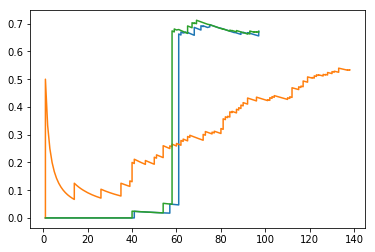

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline 

right_df['p-value by prediction generation'] *= -1
wrong_df['p-value by prediction generation'] *= -1
#print(right_df['p-value by prediction generation'])


x1, y1 = uniqueFDR(MergeList(list(zip(strToDouble(right_df['Score'].tolist()), right_df['prediction id'].tolist())),
                       list(zip(wrong_df['Score'].tolist(), wrong_df['prediction id'].tolist()))))
plt.plot(x1, y1)
x3, y3 = uniqueFDR(MergeList(list(zip(right_df['Norm Score By Prediction'].tolist(), right_df['prediction id'].tolist())), 
                       list(zip(wrong_df['Normalized score'].tolist(), wrong_df['prediction id'].tolist()))))
plt.plot(x3, y3)
x2, y2 = uniqueFDR(MergeList(list(zip(list(zip(right_df['p-value by prediction generation'].tolist(), 
                                strToDouble(right_df['Score'].tolist()))), 
                               right_df['prediction id'].tolist())),
                       list(zip(list(zip(wrong_df['p-value by prediction generation'].tolist(), 
                                wrong_df['Score'].tolist())),
                               wrong_df['prediction id'].tolist())) ))
plt.plot(x2, y2)

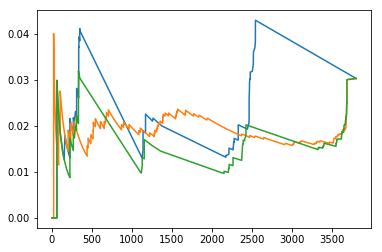

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline 

right_df = pd.read_csv('../../data/rt.csv')
wrong_df = pd.read_csv('../../data/wt.csv')

right_df['p-value by prediction generation'] *= -1
wrong_df['p-value by prediction generation'] *= -1

x1, y1 = FDR(MergeList(right_df['Score'].tolist(), wrong_df['Score'].tolist()))
plt.plot(x1, y1)
x3, y3 = FDR(MergeList(right_df['Norm Score By Prediction'].tolist(), wrong_df['Norm Score By Prediction'].tolist()))
plt.plot(x3, y3)
x2, y2 = FDR(MergeList(list(zip(right_df['p-value by prediction generation'].tolist(), strToDouble(right_df['Score'].tolist()))),
                       list(zip(wrong_df['p-value by prediction generation'].tolist(), wrong_df['Score'].tolist()))))
plt.plot(x2, y2)

245 35
245 34
245 33


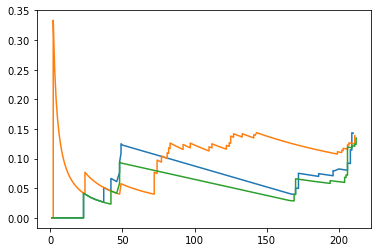

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline 

right_df['p-value by prediction generation'] *= -1
wrong_df['p-value by prediction generation'] *= -1
#print(right_df['p-value by prediction generation'])


x1, y1 = uniqueFDR(MergeList(list(zip(right_df['Score'].tolist(), right_df['prediction id'].tolist())),
                       list(zip(wrong_df['Score'].tolist(), wrong_df['prediction id'].tolist()))))
plt.plot(x1, y1)
x3, y3 = uniqueFDR(MergeList(list(zip(right_df['Norm Score By Prediction'].tolist(), right_df['prediction id'].tolist())), 
                       list(zip(wrong_df['Norm Score By Prediction'].tolist(), wrong_df['prediction id'].tolist()))))
plt.plot(x3, y3)
x2, y2 = uniqueFDR(MergeList(list(zip(list(zip(right_df['p-value by prediction generation'].tolist(), 
                                strToDouble(right_df['Score'].tolist()))), 
                               right_df['prediction id'].tolist())),
                       list(zip(list(zip(wrong_df['p-value by prediction generation'].tolist(), 
                                wrong_df['Score'].tolist())),
                               wrong_df['prediction id'].tolist())) ))
plt.plot(x2, y2)